# Projeto 3

In [279]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import *

### Define a função modelo

In [280]:
# Parâmetros
massa_bola=2
k_mola= 80000
# deformacao_mola=0.05
g=9.8
Cd=0.47
p=1.2
A=pi*0.08**2
c=100


# Condições iniciais
y0=1
vy0=0

# Tempo
tempo = np.arange(0,10,0.01)



def modelo(X,t):
    
    y = X[0] # Posição y
    vy = X[1] # Velocidade y

    D = 1/2 * p * Cd * A * (vy) * abs(vy)
    Fel = k_mola * (-y) # Força elástica
    P = massa_bola * g # Peso
    F_amort = c * (-vy) # Força amortecimento

    if y>0:
        Fel=0
        F_amort = 0
    
    elif y<0 and vy>0:
        F_amort = 0
        D = 0

    # Equações diferenciais
    dydt = vy
    dvydt = (-P + Fel - D + F_amort) / massa_bola

    return [dydt,dvydt]


### ODEINT + Plot

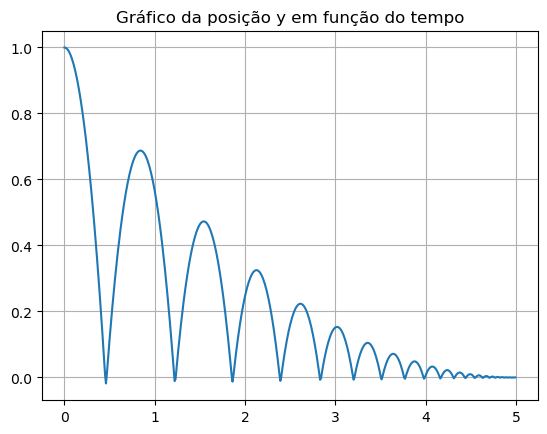

In [281]:

y_0 = 1 # posicao inicial no eixo y
Vy_0 = 0 # velocidade inicial na direção do eixo y
condicoes_iniciais = [y_0, Vy_0] 

tempo_inicial = 0
tempo_final = 5
dt = 1e-2


tempo = np.arange(tempo_inicial, tempo_final, dt)

lista = odeint(modelo, condicoes_iniciais, tempo)
lista_y = lista[:,0]
lista_vy = lista[:,1]

plt.plot(tempo, lista_y, label='y(t)')
plt.title('Gráfico da posição y em função do tempo')
plt.grid()
plt.show()